<a href="https://colab.research.google.com/github/JohannesKarwou/notebooks/blob/main/mlCorrection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import MaxNLocator
import seaborn as sns

from matplotlib.legend_handler import HandlerTuple
plt.set_loglevel("WARNING")

In [7]:
# set up color palette
palett = sns.color_palette(n_colors=8)
palett_as_hex = palett.as_hex()

c1, c2, c3, c4, c5, c7 = (
    palett_as_hex[0],
    palett_as_hex[1],
    palett_as_hex[2],
    palett_as_hex[3],
    palett_as_hex[4],
    palett_as_hex[6],
)
c8 = matplotlib.colors.to_rgba("k", alpha=0.1)
c8_2 = matplotlib.colors.to_rgba("k", alpha=0.01)
# c5 = lila
# c7= rosa

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/JohannesKarwou/notebooks/main/data/combined_EXS_and_UV_dataset.csv")

In [5]:
data = data.dropna(subset=["dG (corrected)"])

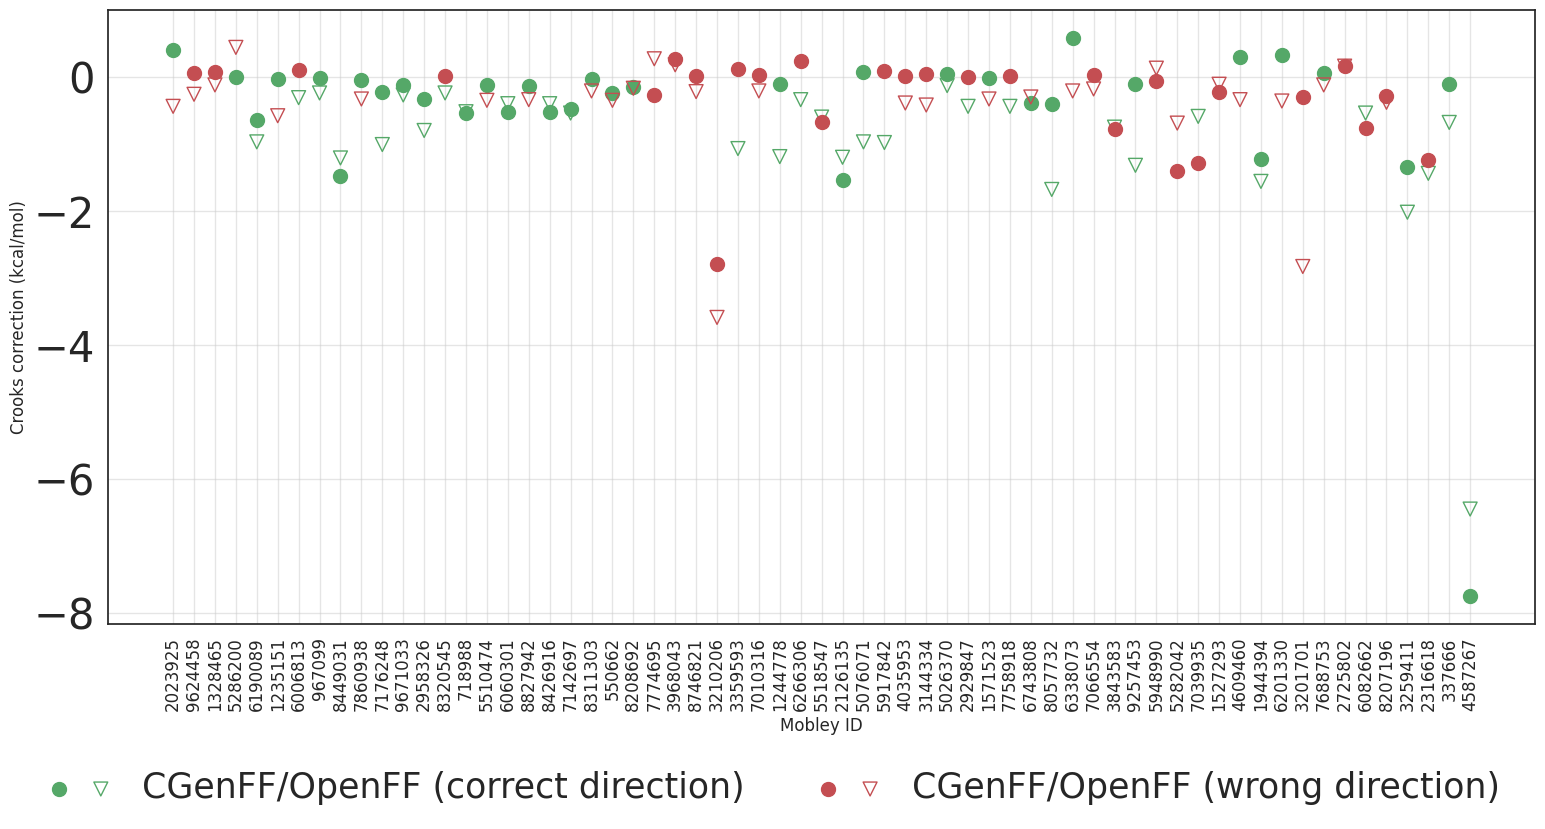

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(16, 8))


data = data.sort_values(by="experimental value (kcal/mol)", ascending=False)

sns.set_theme(
    style="white",
    rc={
        "font.size": 25,
        "legend.fontsize": 30,
        "lines.markersize": 10,
        "xtick.labelsize": 12,
        "ytick.labelsize": 30,
    },
)

wrongDirection = []
for index, row in data.iterrows():
    if not np.isnan(data["experimental value (kcal/mol)"][index]):
        noCorrection = np.abs(
            data["experimental value (kcal/mol)"][index] - data["dG (CgenFF) lrc"][index]
        )
        corrected = np.abs(
            data["experimental value (kcal/mol)"][index]
            - data["dG (corrected)"][index]
        )
        noCorrection_exs = np.abs(
            data["experimental value (kcal/mol)"][index] - data["MM-ASFE"][index]
        )
        corrected_exs = np.abs(
            data["experimental value (kcal/mol)"][index]
            - data["ML-ASFE"][index]
        )
        if noCorrection > corrected and np.abs(data["Crooks correction"][index]) > 0.1:
            axs.scatter(
                x=data["# compound id (and file prefix)"][index].split("_")[-1],
                y=data["Crooks correction"][index],
                #yerr=data["error"][index],
                color=c3,
                marker="v",
                #ecolor="black",
                #capsize=3,
                #markerfacecolor = "none",
                facecolors = "none",
                #markeredgewidth = 3,
                label = "CGenFF"
            )

        if noCorrection_exs > corrected_exs and np.abs(data["Crooks correction"][index]) > 0.1:

            axs.scatter(
                x=data["# compound id (and file prefix)"][index].split("_")[-1],
                y=(-data["MM-ASFE"][index]+data["ML-ASFE"][index]),
                #yerr=data["error"][index],
                color=c3,
                marker="o",
                #ecolor="black",
                #capsize=3,
                label = "OpenFF",
            )


        if noCorrection < corrected and np.abs(data["Crooks correction"][index]) > 0.1:
            axs.scatter(
                x=data["# compound id (and file prefix)"][index].split("_")[-1],
                y=data["Crooks correction"][index],
                #yerr=data["error"][index],
                color=c4,
                marker="v",
                #ecolor="black",
                #capsize=3,
                #markerfacecolor = "none",
                facecolors = "none",
                #markeredgewidth = 3,
                label = "CGenFF",
            )


        if noCorrection_exs < corrected_exs and np.abs(data["Crooks correction"][index]) > 0.1:

            axs.scatter(
                x=data["# compound id (and file prefix)"][index].split("_")[-1],
                y=(-data["MM-ASFE"][index]+data["ML-ASFE"][index]),
                #yerr=data["error"][index],
                color=c4,
                marker="o",
                #ecolor="black",
                #capsize=3,
                label = "OpenFF",
            )



axs.set_ylabel("Crooks correction (kcal/mol)")
axs.set_xlabel("Mobley ID")

lines_labels = [axs.get_legend_handles_labels() for axs in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(
    [(lines[0],lines[-2]),(lines[3],lines[2])],
    ["CGenFF/OpenFF (correct direction)","CGenFF/OpenFF (wrong direction)"],
    loc="lower center",
    ncol=4,
    frameon=False,
    bbox_to_anchor=(0.5, -0.08),
    fontsize=25,
    handler_map={tuple: HandlerTuple(ndivide=None)},
)


plt.xticks(rotation=90)
axs.grid(alpha=0.5)

plt.tight_layout()
# plt.savefig(
#     "figures/ml_correction.pdf"
# )